In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests
import os
import re
import glob

from datetime import datetime
import dataframe_image as dfi
from statsmodels.tsa.seasonal import seasonal_decompose
import time

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score

In [2]:
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4"

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4


In [3]:
# function to download all listings data
def get_listings_crete_timeseries():
    """Function scraping all links to listings.csv files available on insideairbnb.com
    website, and saving downloaded files in a /data/raw-data folder.
    The files are named after their collection date (YYYY-MM.csv)."""
    soup = bs(requests.get('http://insideairbnb.com/get-the-data.html').content,'lxml')
    link_lst = [i['href'] for i in soup.select("td:contains('Crete')+td>a[onclick*=listings]")]
    subfolder_names = ['raw-data']
    for subfolder_name in subfolder_names:
        os.makedirs(os.path.join('data5',subfolder_name))
    for link in link_lst:
        file = pd.read_csv(link)
        date = re.findall(r'20\d{2}-\d{2}',link)[0]
        file.to_csv(f'data5/raw-data/crete_{date}.csv',index=False)
get_listings_crete_timeseries()

In [4]:
# pull in detailed_listings
raw_df_crete = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_detailed.csv')

print(f"The detailed listings dataset contains {len(raw_df_crete)} AirBnb listings.")
#print(f"The most recent listings dataset contains {len(crete_raw_df_11_4_2021)} Airbnb listings.")


The detailed listings dataset contains 20178 AirBnb listings.


In [5]:
crete_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2020-12.csv')
crete_raw_df_12_12_2020.shape





(18091, 16)

In [6]:
# use magic commands 'cd' to change directory
# use glob to locate all files for crete
%cd "/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1"
files_crete = glob.glob('crete/**.csv')
files_crete

/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data1


['crete/Crete_2021-09.csv',
 'crete/Crete_2021-08.csv',
 'crete/Crete_2020-11.csv',
 'crete/Crete_2020-12.csv',
 'crete/Crete_2021-01.csv',
 'crete/Crete_2021-03.csv',
 'crete/Crete_2021-02.csv',
 'crete/Crete_2021-07.csv',
 'crete/Crete_2021-10.csv',
 'crete/Crete_2021-04.csv']

In [9]:
# create individual dataframes for each file
# summarize each file (# of listings; avg price in euro)

crete_raw_df_12_12_2020 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2020-12.csv')
print(f"The 12_12_2020 dataset contains {len(crete_raw_df_12_12_2020)} AirBnb listings; the avg price is €{round(crete_raw_df_12_12_2020['price'].mean(),2)}.")

crete_raw_df_1_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-01.csv')
print(f"The 1_9_2021 dataset contains {len(crete_raw_df_1_9_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_1_9_2021['price'].mean(),2)}.")

crete_raw_df_2_8_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-02.csv')
print(f"The 2_8_2021 dataset contains {len(crete_raw_df_2_8_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_2_8_2021['price'].mean(),2)}.")

crete_raw_df_3_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-03.csv')
print(f"The 3_4_2021 dataset contains {len(crete_raw_df_3_4_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_3_4_2021['price'].mean(),2)}.")

crete_raw_df_4_9_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-04.csv')
print(f"The 4_9_2021 dataset contains {len(crete_raw_df_4_9_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_4_9_2021['price'].mean(),2)}.")

#crete_raw_df_5_19_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-05.csv')
#print(f"The 5_19_2021 dataset contains {len(crete_raw_df_5_19_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_5_19_2021['price'].mean(),2)}.")

#crete_raw_df_6_3_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-06.csv')
#print(f"The 6_3_2021 dataset contains {len(crete_raw_df_6_3_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_6_3_2021['price'].mean(),2)}.")

crete_raw_df_7_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-07.csv')
print(f"The 7_4_2021 dataset contains {len(crete_raw_df_7_4_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_7_4_2021['price'].mean(),2)}.")

crete_raw_df_8_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-08.csv')
print(f"The 8_6_2021 dataset contains {len(crete_raw_df_8_6_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_8_6_2021['price'].mean(),2)}.")

crete_raw_df_9_7_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-09.csv')
print(f"The 9_7_2021 dataset contains {len(crete_raw_df_9_7_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_9_7_2021['price'].mean(),2)}.")

crete_raw_df_10_6_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-10.csv')
print(f"The 10_6_2021 dataset contains {len(crete_raw_df_10_6_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_10_6_2021['price'].mean(),2)}.")

#crete_raw_df_11_4_2021 = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/Airbnb/data4/raw-data/crete/crete_2021-11.csv')
#print(f"The 11_4_2021 dataset contains {len(crete_raw_df_11_4_2021)} AirBnb listings; the avg price is €{round(crete_raw_df_11_4_2021['price'].mean(),2)}.")


The 12_12_2020 dataset contains 18091 AirBnb listings; the avg price is €268.73.
The 1_9_2021 dataset contains 18316 AirBnb listings; the avg price is €279.93.
The 2_8_2021 dataset contains 18521 AirBnb listings; the avg price is €279.71.
The 3_4_2021 dataset contains 18915 AirBnb listings; the avg price is €280.21.
The 4_9_2021 dataset contains 19431 AirBnb listings; the avg price is €173.43.
The 7_4_2021 dataset contains 19673 AirBnb listings; the avg price is €208.33.
The 8_6_2021 dataset contains 20056 AirBnb listings; the avg price is €195.98.
The 9_7_2021 dataset contains 20301 AirBnb listings; the avg price is €165.7.
The 10_6_2021 dataset contains 20180 AirBnb listings; the avg price is €225.38.


In [10]:
df_list_crete = [crete_raw_df_12_12_2020, crete_raw_df_1_9_2021, crete_raw_df_2_8_2021,
           crete_raw_df_3_4_2021, crete_raw_df_4_9_2021,  crete_raw_df_7_4_2021,
           crete_raw_df_8_6_2021, crete_raw_df_9_7_2021, crete_raw_df_10_6_2021]

dates_crete = ['12_12_2020', '01_9_2021', '02_08_2021','03_04_2021', '04_09_2021',
         '07_04_2021', '08_06_2021', '09_07_2021', '10_06_2021']

files_crete = ['2020-12', '2021-01', '2021-02', '2021-03', '2021-04','2021-07', '2021-08',
                  '2021-09', '2021-10']


df_final_crete = []

def airbnb_parse_crete(df_list, files):
    for file in files_crete:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/crete/crete_{file}.csv")
        print(f"The {file} crete dataset contains {len(df_file)} AirBnb listings -- the avg price is €{round(df_file['price'].mean(),2)}.")
        #print(f"The avg price per night out of {len(df_file)} listings is  ${round(df_file['price'].mean(),2)}.")


def airbnb_to_frame_crete(df_list, dates):
    for file in files_crete:
        df_file = pd.read_csv(f"/Users/brendan/Desktop/Python/Two Sigma Projects/Airbnb/data1/crete/crete_{file}.csv")
        #print(f"The {date} Paris dataset contains {len(df_file)} AirBnb listings -- the avg price is ${round(df_file['price'].mean(),2)}.")
        df_final_crete.append(
        {
            'Date of scrape': file.replace('_', '/'),
            '# of Listings': len(df_file),
            'Avg Price': round(df_file['price'].mean(),2),
            'Median Price': round(df_file['price'].median(),2),
            'Min Price': df_file['price'].min(),
            'Max Price': df_file['price'].max(),
            'Avg reviews per month': round(df_file['reviews_per_month'].mean(),2)
        })
    
    return pd.DataFrame(df_final_crete)

crete_parse = airbnb_parse_crete(df_list_crete, files_crete)


The 2020-12 crete dataset contains 18091 AirBnb listings -- the avg price is €268.73.
The 2021-01 crete dataset contains 18316 AirBnb listings -- the avg price is €279.93.
The 2021-02 crete dataset contains 18521 AirBnb listings -- the avg price is €279.71.
The 2021-03 crete dataset contains 18915 AirBnb listings -- the avg price is €280.21.
The 2021-04 crete dataset contains 19431 AirBnb listings -- the avg price is €173.43.
The 2021-07 crete dataset contains 19673 AirBnb listings -- the avg price is €208.33.
The 2021-08 crete dataset contains 20056 AirBnb listings -- the avg price is €195.98.
The 2021-09 crete dataset contains 20301 AirBnb listings -- the avg price is €165.7.
The 2021-10 crete dataset contains 20180 AirBnb listings -- the avg price is €225.38.


In [11]:
crete_summary = airbnb_to_frame_crete(df_list_crete, files_crete)
crete_summary['Date of scrape'] = pd.to_datetime(crete_summary['Date of scrape'])
crete_summary['City'] = 'crete'
crete_summary

,Date of scrape,# of Listings,Avg Price,Median Price,Min Price,Max Price,Avg reviews per month,City
0,2020-12-01,18091,268.73,75.0,9,15870,0.49,crete
1,2021-01-01,18316,279.93,75.0,7,15870,0.47,crete
2,2021-02-01,18521,279.71,75.0,7,15870,0.45,crete
3,2021-03-01,18915,280.21,76.0,9,21000,0.43,crete
4,2021-04-01,19431,173.43,77.0,9,21000,0.42,crete
5,2021-07-01,19673,208.33,90.0,9,21000,0.61,crete
6,2021-08-01,20056,195.98,90.0,9,21000,0.91,crete
7,2021-09-01,20301,165.70,77.0,9,21000,0.91,crete
8,2021-10-01,20180,225.38,75.0,9,21000,0.84,crete


In [12]:
master_df_crete = pd.concat(df_list_crete)
master_df_crete_unique = master_df_crete.drop_duplicates(subset='id')
master_df_crete_unique.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,27966,Heraklion-Pinelopi Apartment,120502,Antonia & Manolis,NaN,Μαλεβιζίου,35.33198,25.08182,Entire home/apt,45,2,120,2020-11-15,4.41,3,0,NaN,NaN
1,28970,artists' house in the old town,124670,Eirini,NaN,Ηρακλείου,35.34005,25.12809,Entire home/apt,70,1,52,2017-10-16,0.41,2,89,NaN,NaN
2,29856,Matala Dimitris Villa and Hotel,128653,Dimitris,NaN,Φαιστού,34.99311,24.74964,Private room,50,1,40,2019-10-13,0.32,2,220,NaN,NaN
3,31023,Guesthouse Chryssoula Room No1,133208,Chryssoula,NaN,Χανίων,35.51591,24.01751,Entire home/apt,35,2,266,2020-09-01,2.58,4,270,NaN,NaN
4,31789,Kissamos Windmills,136649,Georgios,NaN,Κισσάμου,35.49762,23.69768,Entire home/apt,200,3,2,2012-09-23,0.02,1,365,NaN,NaN


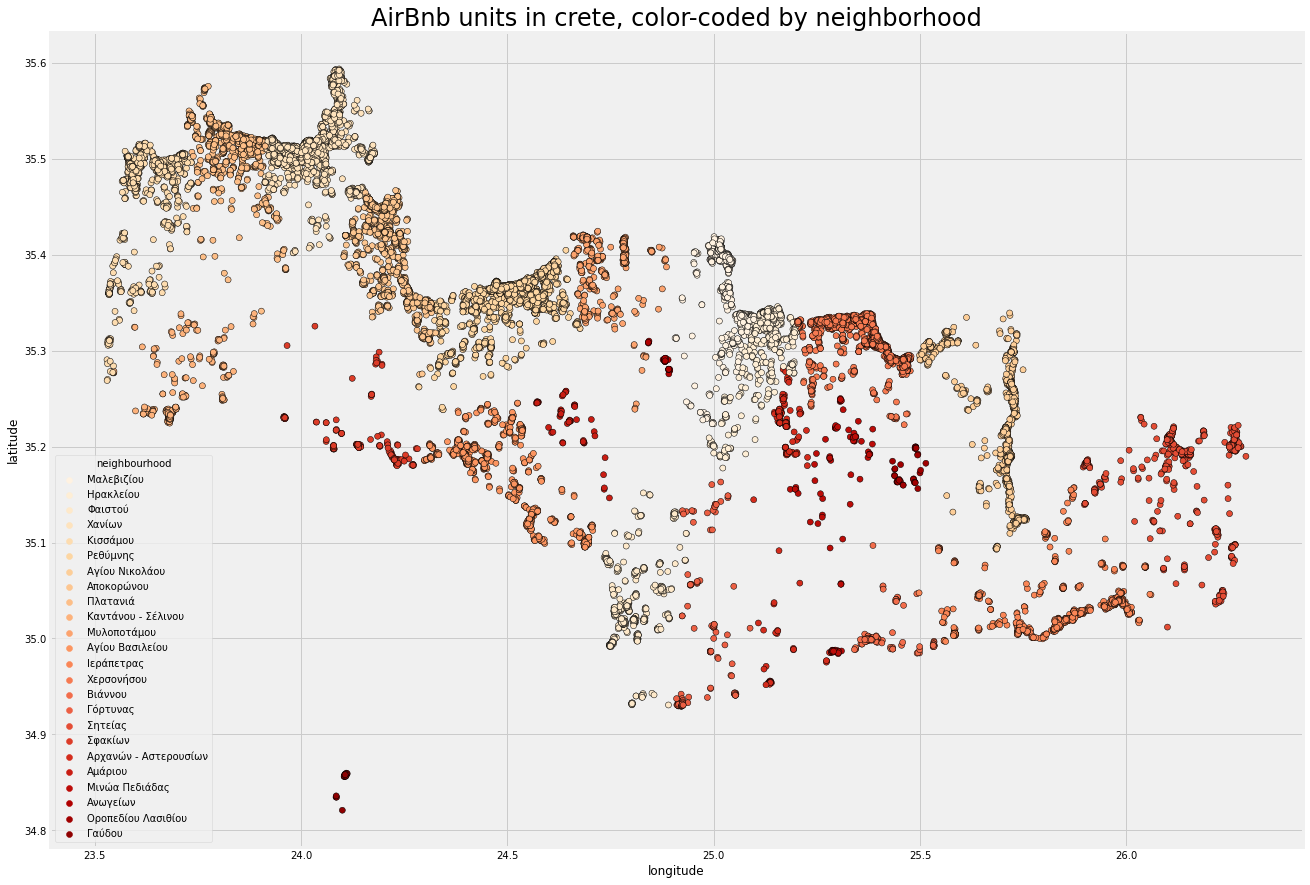

In [13]:
title = 'AirBnb units in crete, color-coded by neighborhood'
plt.figure(figsize=(20,15))
sns.set_palette("OrRd")
sns.scatterplot(master_df_crete_unique.longitude, master_df_crete_unique.latitude, hue = master_df_crete_unique.neighbourhood, palette='OrRd', edgecolor='black').set_title(title, fontsize=24)
plt.savefig('airbnb_unit_crete.png')
plt.show()

## Add review data through a join

In [14]:
df_reviews = pd.concat([crete_raw_df_10_6_2021,raw_df_crete],axis=1, join='outer')
df_reviews_ = df_reviews.loc[:,~df_reviews.columns.duplicated()]
df_reviews_

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,27966,Heraklion-Pinelopi Apartment,120502,Antonia & Manolis,NaN,Μαλεβιζίου,35.331980,25.081820,Entire home/apt,45,...,4.93,4.89,4.96,4.99,4.60,4.91,t,2.0,0.0,0.0
1,28970,artists' house in the old town,124670,Eirini,NaN,Ηρακλείου,35.340050,25.128090,Entire home/apt,70,...,4.49,4.20,4.78,4.96,4.51,4.51,f,2.0,0.0,0.0
2,29130,"Villa Kallergi - Athena, 640m²",125281,Dimitrios,NaN,Ρεθύμνης,35.355960,24.584100,Entire home/apt,111,...,4.78,4.56,4.78,4.56,4.67,4.78,f,3.0,0.0,0.0
3,29849,"Villa Kallergi - Nefeli, 6 guests",125281,Dimitrios,NaN,Ρεθύμνης,35.354410,24.587130,Entire home/apt,79,...,4.83,4.83,5.00,5.00,4.67,4.83,f,3.0,0.0,0.0
4,29856,Matala Dimitris Villa - Four Bed Room,128653,Dimitris,NaN,Φαιστού,34.993110,24.749640,Private room,4601,...,4.11,4.49,4.26,4.40,4.50,4.20,t,0.0,4.0,0.0
5,31023,Guesthouse Chryssoula Room No1,133208,Chryssoula,NaN,Χανίων,35.515910,24.017510,Entire home/apt,41,...,4.68,4.65,4.85,4.81,4.93,4.63,t,3.0,1.0,0.0
6,31789,Kissamos Windmills,136649,Georgios,NaN,Κισσάμου,35.497620,23.697680,Entire home/apt,200,...,4.50,5.00,5.00,4.50,4.00,4.50,f,1.0,0.0,0.0
7,34280,Bellevue Village&Suites in Crete#1,147711,George,NaN,Μαλεβιζίου,35.398360,25.023340,Entire home/apt,45,...,4.84,4.78,4.91,4.93,4.65,4.86,t,7.0,2.0,0.0
8,78955,MIRSINI Hotel Beautiful Room in Crete,424686,Petros,NaN,Αγίου Νικολάου,35.196560,25.713830,Private room,29,...,4.56,4.75,4.88,4.89,4.69,4.66,t,0.0,5.0,0.0
9,79981,King Suite in Villa Margarita short or long stay,431725,George,NaN,Χερσονήσου,35.320400,25.389250,Private room,60,...,4.00,5.00,4.00,4.00,5.00,5.00,t,1.0,3.0,0.0


## Regression

In [15]:
#df_reviews_.columns

In [16]:
df_regression = df_reviews_.copy()
df_regression_ = df_regression[['id', 'property_type', 'room_type', 'accommodates',
                               'bedrooms', 'beds', 'price', 'availability_90','review_scores_rating',
                               'review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]
df_regression_ = df_regression_[df_regression_['beds'].notna()]
df_regression_ = df_regression_[df_regression_['bedrooms'].notna()]
df_regression_['price'] = pd.to_numeric(df_regression_['price'])
df_regression_.isna().sum()

df_regression_=df_regression_.fillna(df_regression_.mean())

In [17]:
X_ = df_regression_[['accommodates', 'bedrooms','beds',
        'availability_90','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_location',
                               'review_scores_value']]

y = df_regression_['price'].replace({'\$':''}, regex = True)
Y = y.replace({',':''}, regex=True)

# with sklearn
regr = LinearRegression()
regr.fit(X_, Y)

print('Intercept: ', regr.intercept_)
print('Coefficients: ', regr.coef_)

print (regr)

Intercept:  298.58832852140466
Coefficients:  [ -6.20357712  70.49730462  -0.75948413  -1.05516285  -9.16432801
 -30.12605344  53.47668843  -8.51090686 -36.04054444]
LinearRegression()


In [18]:
y_pred2 = regr.predict(X_)

In [19]:
df_mult= pd.DataFrame({'Actual': Y, 'Predicted': y_pred2.flatten()})
df_mult['Diff'] = df_mult['Predicted'] - df_mult['Actual']
df_mult_sort = df_mult.sort_values(by=['Diff'])
#df_result = (df_mult_sort[df_mult_sort['Actual'] >=75]) && (df_mult_sort[df_mult_sort['Actual'] <=300])
df_result = df_mult_sort.query('Actual >= 75 & Actual <= 400')
df_result.head()

,Actual,Predicted,Diff
15266,400,110.965148,-289.034852
7968,400,118.223888,-281.776112
7964,400,118.223888,-281.776112
7965,400,118.223888,-281.776112
7967,400,118.223888,-281.776112


<function matplotlib.pyplot.ylim(*args, **kwargs)>

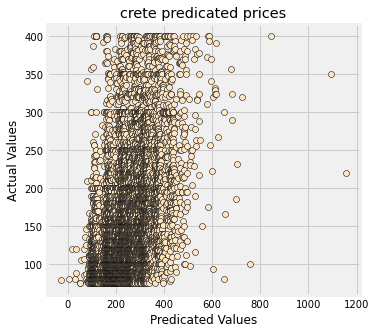

In [20]:
x = df_result['Predicted']
y = df_result['Actual']
plt.figure(figsize=(5,5))
plt.title('')
plt.xlabel('Predicated Values')
plt.ylabel('Actual Values')
plt.title('crete predicated prices')
plt.scatter(x,y, edgecolor='black')
plt.ylim